In [183]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("Placa_de_video_tratada.xlsx")
display(df)

,marca,preco,desconto_em_%,frete,avaliacoes,estrelas,memoria_em_GB,tipo_memoria,bits,parcelas,valor_un_parcela
0,ASROCK,1599.90,11,Pago,1103,5,8,GDDR6,0,10,188.22
1,AMD,1999.99,4,Pago,481,5,8,GDDR6,128,10,235.29
2,XFX,2599.99,7,Pago,503,5,12,GDDR6,0,10,305.88
3,XFX,1879.99,0,Pago,237,5,8,GDDR6,0,10,221.17
4,PALIT,2299.99,7,Pago,99,5,8,GDDR6,0,10,270.58
...,...,...,...,...,...,...,...,...,...,...,...
489,AFOX,323.83,0,Pago,0,0,1,DDR3,0,10,34.45
490,AFOX,1004.40,0,Pago,0,0,2,GDDR5,128,10,100.44
491,NVIDIA,5592.00,0,Grátis,0,0,6,GDDR6,192,10,699.00
492,SEM MARCA,21.90,0,Pago,0,0,0,Sem Tipo,0,1,21.90


# Preço Médio

In [184]:
media = df["preco"].mean()
display(media)

np.float64(3903.853157894737)

# Quantidade de fretes grátis e pagos

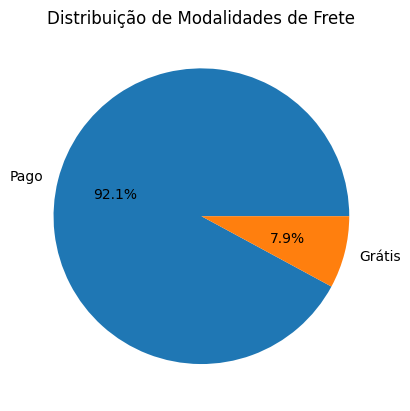

,frete,quantidade
0,Pago,455
1,Grátis,39


In [185]:
fretes_qt = df["frete"].value_counts().reset_index()
fretes_qt.columns = ["frete", "quantidade"]

plt.figure()
plt.pie(fretes_qt["quantidade"], labels=fretes_qt["frete"], autopct='%1.1f%%')
plt.title("Distribuição de Modalidades de Frete")
plt.show()

display(fretes_qt)

# Quantidade de estrelas por marca

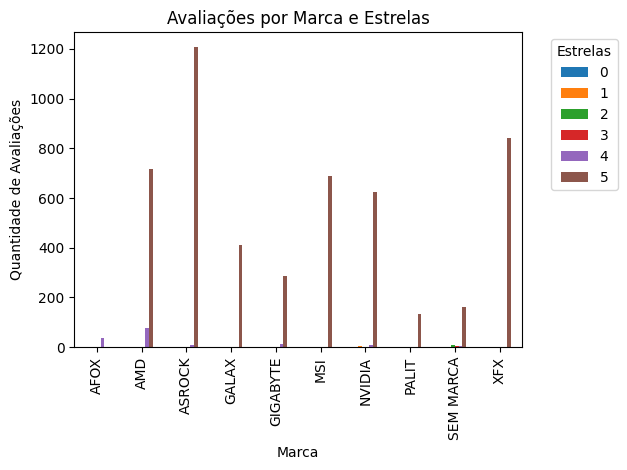

,marca,estrelas,avaliacoes
3,AFOX,5,2
2,AFOX,4,36
1,AFOX,1,2
0,AFOX,0,0
6,AMD,5,717
5,AMD,4,79
4,AMD,0,0
9,ASROCK,5,1206
8,ASROCK,4,9
7,ASROCK,0,0


In [186]:
# Agrupa por marca e estrelas e soma a quantidade de avaliações
avaliacoes_por_marca = df.groupby(['marca', 'estrelas'])['avaliacoes'].sum().reset_index()

# Ordena para visualização mais fácil
avaliacoes_por_marca = avaliacoes_por_marca.sort_values(by=['marca', 'estrelas'], ascending=[True, False])


pivot = avaliacoes_por_marca.pivot(index='marca', columns='estrelas', values='avaliacoes').fillna(0)

# Gera o gráfico de barras
ax = pivot.plot(kind='bar')
ax.set_xlabel('Marca')
ax.set_ylabel('Quantidade de Avaliações')
ax.set_title('Avaliações por Marca e Estrelas')
ax.legend(title='Estrelas', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

display(avaliacoes_por_marca)


# Descontos por quantidade

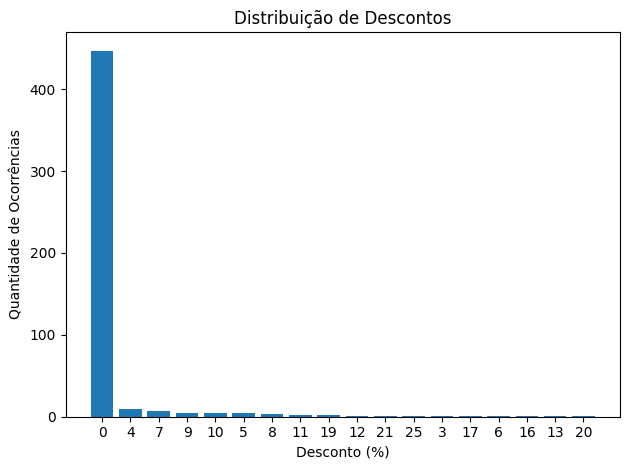

,desconto_em_%,quantidade
0,0,447
1,4,10
2,7,7
3,9,5
4,10,5
5,5,4
6,8,3
7,11,2
8,19,2
9,12,1


In [187]:
descontos_por_qt = df["desconto_em_%"].value_counts().reset_index()
descontos_por_qt.columns = ["desconto_em_%", "quantidade"]

plt.figure()
plt.bar(descontos_por_qt["desconto_em_%"].astype(str), descontos_por_qt["quantidade"])
plt.xlabel("Desconto (%)")
plt.ylabel("Quantidade de Ocorrências")
plt.title("Distribuição de Descontos")
plt.tight_layout()
plt.show()

display(descontos_por_qt)